In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import innvestigate.utils.visualizations as ivis
%matplotlib inline

Using TensorFlow backend.


In [34]:
out_dir = 'figs' # TODO path to file

In [5]:
loaded = np.load('data/avgs.npz') # TODO path to file
avg_over_samples, avg_over_frames, avg_over_positive_samples,avg_over_negative_samples = loaded['avg_over_samples'], loaded['avg_over_frames'], loaded['avg_over_positive_samples'],loaded['avg_over_negative_samples']
avg_over_samples_s, avg_over_frames_s, avg_over_positive_samples_s,avg_over_negative_samples_s = loaded['avg_over_samples_s'], loaded['avg_over_frames_s'], loaded['avg_over_positive_samples_s'],loaded['avg_over_negative_samples_s']

In [6]:
avg = np.mean(np.mean(avg_over_samples, axis=-1), axis=-1)
avg.shape

(85,)

# bar chart of the mean relevance per frame

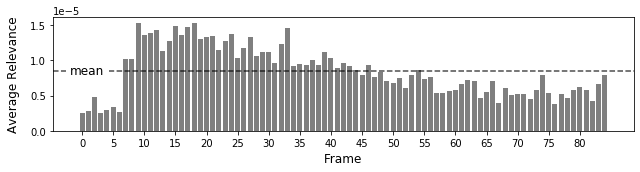

In [38]:
n_frames = 85
# objects = np.arange(0,n_frames, 5)
y_pos = np.arange(n_frames)
performance = avg

fig = plt.figure(figsize=(9,2.5))


plt.bar(y_pos, performance, alpha=0.5, color='black')
# plt.xticks(y_pos, objects)
plt.xticks(np.arange(0,n_frames,5))
plt.ylabel('Average Relevance', fontsize=12, labelpad=10)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Frame', fontsize=12)

plt.axhline(np.mean(avg), color="black", ls='--', alpha=0.7)
plt.text(-2, np.mean(avg)*0.95, 'mean', fontsize=12, backgroundcolor='w')

plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'bars.pdf'), bbox_inches='tight')
plt.show()

In [6]:
a = np.sort(avg)[::-1]
tot = np.sum(a)

In [7]:
np.sum(a[:55])/tot, 55/85

(0.80140096, 0.6470588235294118)

In [8]:
np.std(avg)

3.5187516e-06

In [9]:
# We cannot identify a few extremely important frames.
# => The pareto principle does not hold here. 80\% of the total relevance comes from 65\% of all frames.

# Nevertheless, the distribution shows unequivocally the importance of actual tail movement.
# That is because we included 15 frames of buffer bevor each movement, to be sure to not cut away any of the whip motion.
# Most videos will therefore have their most characteristic tail movements around frame 15.
# For the same reason, most videos will have almost no optical flow in the first few frames.
# The CNN has consequently only little input coming from these frames.
# We could cut away the first 7 frames to speed up training.

# The border or lookahead effect as described in \cite{Anders2018} cannot be observed here.

# The boxplot does not show any outliers

# Create a heatmap of size 224x224 over all samples and frames

In [11]:
# We would expect the average heatmap over all samples and frames to be vertically symmetric, since every frame was flipped vertically
# However, it picks up the agarose only at the top. Very strange. Might be a bias introduced by the pretrained weights.
# We see very well how it focuses mainly on the start of the tail and bases its classification almost entirely on the body of tail
# and not on the tip.
# Although we can observe in individual samples that the CNN does pay some attention to the blobs and impurities of the background,
# this seems to happen relatively little, because it does not become visible on this average frame.

In [12]:
heat = np.mean(avg_over_samples, axis=0)
heat.shape

(224, 224)

In [13]:
# plt.subplot(121)
# h = np.tile(heat[np.newaxis, np.newaxis], (1, 3, 1, 1))
# h = h.swapaxes(1,2).swapaxes(2,3)
# h = ivis.heatmap(h)
# plt.imshow(h[0], alpha=1)

# plt.tick_params(
#     which='both',  # both major and minor ticks are affected
#     bottom=False,  # ticks along the bottom edge are off
#     left=False,  # ticks along the top edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     labelleft=False
# )
# plt.title('Temporal')
# # plt.title('Average Over All Frames and Samples')
# plt.tight_layout()
# # plt.savefig(os.path.join(out_dir, "the_average_frame.pdf"))
# plt.show()

# Split up average between positive and negative responses

In [14]:
# heat_p = np.mean(avg_over_positive_samples, axis=0)
# plt.subplot(121)
# h = np.tile(heat_p[np.newaxis, np.newaxis], (1, 3, 1, 1))
# h = h.swapaxes(1,2).swapaxes(2,3)
# h = ivis.heatmap(h)
# plt.imshow(h[0], alpha=1)

# plt.tick_params(
#     which='both',  # both major and minor ticks are affected
#     bottom=False,  # ticks along the bottom edge are off
#     left=False,  # ticks along the top edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     labelleft=False
# )
# plt.title('Temporal')
# # plt.title('Average Over All Frames and Samples')
# plt.tight_layout()
# # plt.savefig(os.path.join(out_dir, "the_average_positive_frame.pdf"))
# plt.show()

In [15]:
# heat_n = np.mean(avg_over_negative_samples, axis=0)
# plt.subplot(121)
# h = np.tile(heat_n[np.newaxis, np.newaxis], (1, 3, 1, 1))
# h = h.swapaxes(1,2).swapaxes(2,3)
# h = ivis.heatmap(h)
# plt.imshow(h[0], alpha=1)

# plt.tick_params(
#     which='both',  # both major and minor ticks are affected
#     bottom=False,  # ticks along the bottom edge are off
#     left=False,  # ticks along the top edge are off
#     labelbottom=False,  # labels along the bottom edge are off
#     labelleft=False
# )
# plt.title('Temporal')
# # plt.title('Average Over All Frames and Samples')
# plt.tight_layout()
# # plt.savefig(os.path.join(out_dir, "the_average_negative_frame.pdf"))
# plt.show()

# visualize the average sample (positive / negative)

In [17]:
def get_imshow_heatmap(heat):
    h = np.tile(heat[np.newaxis, np.newaxis], (1, 3, 1, 1))
    h = h.swapaxes(1,2).swapaxes(2,3)
    h = ivis.heatmap(h)[0]
    return h

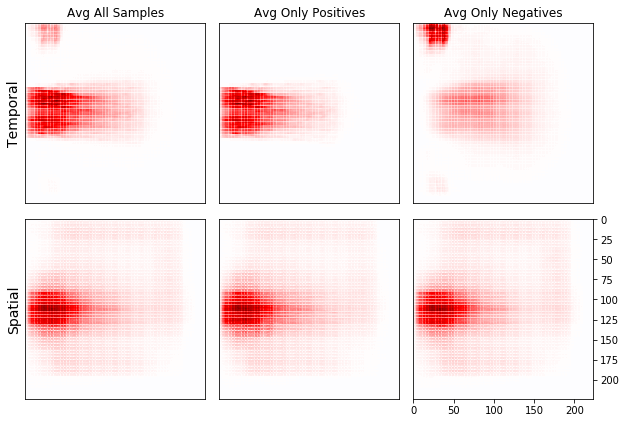

In [43]:
fig = plt.figure(figsize=(8.8,6))

############# TEMPORAL #############
plt.subplot(231)
heat = np.mean(avg_over_samples, axis=0)
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False)
plt.yticks([])
plt.ylabel("Temporal", fontsize=14)
plt.title('Avg All Samples')

plt.subplot(232)
heat_p = np.mean(avg_over_positive_samples, axis=0)
h = get_imshow_heatmap(heat_p)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
plt.title('Avg Only Positives')


plt.subplot(233)
heat_n = np.mean(avg_over_negative_samples, axis=0)
h = get_imshow_heatmap(heat_n)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
plt.title('Avg Only Negatives')


############# SPATIAL #############
plt.subplot(234)
heat = avg_over_samples_s
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False)
plt.yticks([])
plt.ylabel("Spatial", fontsize=14)


plt.subplot(235)
heat = avg_over_positive_samples_s
h = get_imshow_heatmap(heat)
h = np.tile(heat[np.newaxis, np.newaxis], (1, 3, 1, 1))
h = h.swapaxes(1,2).swapaxes(2,3)
h = ivis.heatmap(h)
plt.imshow(h[0], alpha=1)
plt.tick_params(which='both',bottom=False,left=False,labelbottom=False,labelleft=False)

plt.subplot(236)
heat = avg_over_negative_samples_s
h = get_imshow_heatmap(heat)
plt.imshow(h, alpha=1)
plt.tick_params(which='both',bottom=True,left=False,right=True, labelbottom=True,labelleft=False, labelright=True)


plt.tight_layout()
plt.savefig(os.path.join(out_dir, "the_average_frame.pdf"), bbox_inches='tight')
plt.show()

In [ ]:
# temporal: avg only negative shows a clear "Clever Hans" \cite{Lapuschkin2019} type of correlation.
# experimenters might have touched the dish to induce spontaneous bout (c.f. txt file for more explanations)
# spatial: no clear relevance difference. plots are symmetric as expected. most relevance at the body of the tail
# shows some unexpected pattern at the right and bottom edges. relevance might not get distributed correctly somehow.

# Average of the 2% most confident samples

In [ ]:

num_rows = int(85 / 5)  # 17
a = 0
b = a + 5 * num_rows

xxx = x_flow
xx = xxx.copy()
xx = reverse_rescale(xx.astype(np.float32), minmax[:, 0], minmax[:, 1])
xx = xx.reshape(85, 2, 224, 224).swapaxes(1, 2).swapaxes(2, 3)
# print(x_flow.shape)
subset = xx[a:b]

fig = plt.figure(figsize=(15, num_rows * 3))
for i, flow in enumerate(subset):
    plt.subplot(num_rows, 5, i + 1)

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])  # get magnitude and direction/angle
    hsv = np.zeros((flow.shape[0], flow.shape[1], 3), dtype=np.uint8)
    hsv[..., 0] = 255  # sets hue
    hsv[..., 1] = 255  # # Sets image saturation to maximum
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)  # sets value/brightness
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    im = plt.imshow(255-gray, cmap='gray')

    plt.tick_params(
        which='both',  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        left=False,  # ticks along the top edge are off
        labelbottom=False,  # labels along the bottom edge are off
        labelleft=False
    )
    plt.title(i)

    analyzed_frame = analysis_t[np.newaxis, i, :, :]
    a = np.tile(analyzed_frame, (1, 3, 1, 1))
    a = a.swapaxes(1, 2).swapaxes(2, 3)
    h = ivis.heatmap(a)
    h = h[0]

    plt.imshow(h, alpha=alpha_t)

plt.tight_layout()
plt.savefig(os.path.join(out_dir, "avg.pdf".format(names[k])))
